In [126]:
# coding: utf-8
#brew install gprof2dot
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn = gum.BayesNet("Test de reseaux bayesiens")

bn.add(gum.LabelizedVariable("Etiologie", "Quel est l'etiologie de ce patient ?",
                                ["HSV",
                                "VZV",
                                "HLA B27",
                                "Arthrite chronique juvénile",
                                "Behcet",
                                "SEP",
                                "Iridocyclite de Fuchs",
                                "Pars planite",
                                "Rétinite à CMV",
                                "Rétinochroïdite toxoplasmique",
                                "Syphilis",
                                "Rétinochoroïdite de birdshot",
                                "Syndrome des tâches blanches evanescentes",
                                "Ophtalmie sympatique",
                                "Sarcoïdose",
                                "syndrome de VKH stade précoce",
                                "syndrome de VKH stade tardif",
                                "Tuberculose",
                                "Nécrose rétinienne aigüe"]))
bn.add(gum.LabelizedVariable("Region", "Quelle region de l'oeil est touchee ?",
                            ["antérieur", "intermédiaire", "postérieur", "panuvéite"]))
bn.add(gum.LabelizedVariable("Oeil touche", "Quelle zone de l'oeil est touchee ?",
                            ["unilatéral", "bilatéral", "à bascule"]))
bn.add(gum.LabelizedVariable("Mode de debut", "Quel est le mode de debut ?",
                            ["aigue", "récurrent", "chronique", "indéterminé"]))
bn.add(gum.LabelizedVariable("Ethnie", "Quelle est l'ethnie du patient ?",
                            ["blancs", "noirs", "hispanic", "asiatique"]))
bn.add(gum.LabelizedVariable("Genre", "Quel est le genre du patient ?",
                            ["femme", "homme"]))
bn.add(gum.LabelizedVariable("Exclusion", "maladie a exclure",
                            ["eruption de zona", "sérologie tréponémique positive", "sarcoïdose",
                            "sérologie syphilis positive", "sarcoidose prouvée",
                            "syphilis", "sérologie syphilis", "SEP"]))

bn.addArc("Region", "Etiologie")
bn.addArc("Oeil touche", "Etiologie")
bn.addArc("Mode de debut", "Etiologie")
bn.addArc("Ethnie", "Etiologie")
bn.addArc("Genre", "Etiologie")

In [127]:
bn

(pyAgrum.BayesNet<double>@0x7f7d5683ba00) BN{nodes: 7, arcs: 5, domainSize: 58368, dim: 7321}

In [128]:
etiologies = ["HSV","VZV","HLA B27","Arthrite chronique juvénile","Behcet","SEP",
"Iridocyclite de Fuchs","Pars planite","Rétinite à CMV","Rétinochroïdite toxoplasmique",
"Syphilis","Rétinochoroïdite de birdshot","Syndrome des tâches blanches evanescentes",
"Ophtalmie sympatique","Sarcoïdose","syndrome de VKH stade précoce","syndrome de VKH stade tardif",
"Tuberculose","Nécrose rétinienne aigüe"]

probasGenre = np.array([
    0.58, 0.42,
    0.6, 0.4,
    0.46, 0.54,
    0.81, 0.19,
    0.4, 0.6,
    0.85, 0.15, 
    0.5, 0.5,
    0.52, 0.48,
    0.29, 0.71,
    0.2, 0.8,
    0.61, 0.39,
    0.76, 0.34,
    0.5,0.5,
    0.71, 0.29,
    0.74, 0.26,
    0.58,0.42,
    0.5,0.5,
    0.28, 0.72,
    0.5,0.5
]).reshape(19,2)


#blancs noir hisp asia

probasEthnie = np.array([
    0.65,0.12,0.12,0.11,
    0.72,0.10,0.09,0.09,
    0.73,0.07,0.07,0.13,
    0.8,0.07,0.07,0.06,
    0.43,0.04,0.23,0.30,
    0.76,0.08,0.08,0.08, 
    0.75,0.09,0.08,0.08, 
    0.72,0.09,0.09,0.09,
    0.49,0.18,0.17,0.16,
    0.50,0.14,0.12,0.24,
    0.92,0.03,0.03,0.02,
    0.61,0.13,0.13,0.13,
    0.25,0.25,0.25,0.25,
    0.37,0.26,0.13,0.24,
    0.18,0.12,0.18,0.52,
    0.1,0.1,0.15,0.65,
    0.66,0.1,0.11,0.13,
    0.09,0.08,0.03,0.80,
    0.25,0.25,0.25,0.25
]).reshape(19,4)

probasModeDebut = np.array([
    0.13,0.31,0.4,0.16,
    0.38,0.06,0.41,0.15,
    0.15,0.61,0.17,0.07,
    0,0,0.97,0.03,
    0.08,0.12,0.72,0.08,
    0.03,0.02,0.85,0.1, 
    0,0,0.92,0.08, 
    0.02,0.02,0.87,0.09,
    0.54,0.03,0.36,0.07,
    0.62,0.02,0.24,0.12,
    0.01,0.01,0.95,0.03,
    0.87,0.06,0.02,0.05,
    0.25,0.25,0.25,0.25,
    0.05,0.07,0.8,0.08,
    0.54,0.02,0.35,0.09,
    0.02,0.05,0.83,0.11,
    0.43,0.24,0.26,0.07,
    0.25,0.02,0.66,0.07,
    0.25,0.25,0.25,0.25
]).reshape(19,4)

probasOeilTouche = np.array([
    0.99, 0.005, 0.005,
    0.96, 0.02, 0.02,
    0.6, 0.05, 0.35,
    0.34, 0.66, 0.0,
    0.2, 0.8, 0.0,
    0.2, 0.8, 0.0,
    0.98, 0.01, 0.01,
    0.15, 0.85, 0.0,
    0.64, 0.36, 0.0,
    0.44, 0.56, 0.0,
    0.0, 1, 0.0,
    0.96, 0.02, 0.02,
    0.34,0.33,0.33,
    0.18, 0.81, 0.01,
    0.01, 0.99, 0.0,
    0.01, 0.99, 0.0,
    0.88, 0.12, 0.0,
    0.44, 0.56, 0.0,
    0.34,0.33,0.33]).reshape(19,3)

probasRegions = np.array([
    1,0,0,0,
    1,0,0,0,
    1,0,0,0,
    1,0,0,0,
    1,0,0,0,
    1,0,0,0,
    0,1,0,0,
    0,1,0,0,
    0,0,1,0,
    0,0,1,0,
    0,0,1,0,
    0,0,1,0,
    0,0,0,1,
    0,0,0,1,
    0,0,0,1,
    0,0,0,1,
    0,0,0,1,
    0,0,0,1,
    0,0,0,1
]).reshape(19,4)


#Ordre à respecter pour réseau bayésien:
#Genre, Ethnie, Mode, Oeil, Région

probasEtiologie = []

for compteurMaladie in range(len(etiologies)):
    for a in range (len(probasGenre[compteurMaladie])):
        for b in range (len(probasEthnie[compteurMaladie])):
            for c in range(len(probasModeDebut[compteurMaladie])):
                for d in range(len(probasOeilTouche[compteurMaladie])):
                    for e in range(len(probasRegions[compteurMaladie])):
                        probasEtiologie.append(probasGenre[compteurMaladie][a]*probasEthnie[compteurMaladie][b]*probasModeDebut[compteurMaladie][c]*probasOeilTouche[compteurMaladie][d]*probasRegions[compteurMaladie][e]*100)

probasEtiologieArray = np.array(probasEtiologie).reshape([19,384])

In [129]:
probasEtiologieUtilisables = probasEtiologieArray.transpose().reshape(1,7296)

In [130]:
probasFinales = []

for a in range (len(probasEtiologieUtilisables)):
    for b in range (len(probasEtiologieUtilisables[a])):
        probasFinales.append(probasEtiologieUtilisables[a][b])

In [133]:
""" How to use Instantiation to iterate in a cpt """
p_a = bn.cpt("Etiologie") 
i = gum.Instantiation(p_a) 
i.setFirst() 
s = 0.0; 
compteur = 0
    
while (not i.end()): 
    s = probasFinales[compteur]
    p_a.set(i,s)
    i.inc()
    compteur+=1

In [134]:
gnb.showPotential(bn.cpt("Etiologie"))

In [136]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'Genre':'femme','Ethnie':'blancs','Mode de debut':'aigue','Oeil touche':'unilatéral','Region':'antérieur'})
print(ie.posterior("Etiologie"))


  Etiologie                                                                                                                                                                                  |
HSV      |VZV      |HLA B27  |Arthrite |Behcet   |SEP      |Iridocycl|Pars plan|Rétinite|Rétinoch|Syphilis |Rétinoch|Syndrome |Ophtalmie|Sarcoïdo|syndrome |syndrome |Tuberculo|Nécrose |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.1997  | 0.6486  | 0.1244  | 0.0000  | 0.0113  | 0.0160  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |



** pyAgrum** For better visualizations, please install matplotlib-inline.


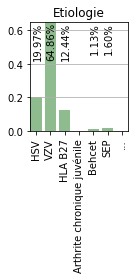

In [137]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'Genre':'femme','Ethnie':'blancs','Mode de debut':'aigue','Oeil touche':'unilatéral','Region':'antérieur'})
gnb.showProba(ie.posterior("Etiologie"))